# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#lets build our URL , fetch url from the API documentation
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&q=" 

In [4]:
#------------------check how the json response looks like , for referencing its data-----------
#query_url = f"{base_url}appid={weather_api_key}&q=sortland"
#print(query_url)
#response = requests.get(query_url).json()
#pprint(response)
#---------------------- Test Complete -----------------------------------------------------------------


In [5]:
#Set up lists to hold responses
lat= []
temp = []
humid = []
cloud = []
w_speed = []


# Loop through the list of cities and perform successive API calls
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"City Name : {response['name']} \nCity Number : {response['id']}\n")
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp']*1.8 - 459.67) # default Unit for temp is kelvin,convert to Fahrenheit
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        w_speed.append(response['wind']['speed']) 
    except KeyError:
              print("City not found, Skipping iteration\n")


City Name : Poli 
City Number : 150689

City Name : Saldanha 
City Number : 3361934

City Name : Upernavik 
City Number : 3418910

City Name : Busselton 
City Number : 2075265

City Name : Yellowknife 
City Number : 6185377

City Name : Katsuura 
City Number : 2112309

City Name : Iranshahr 
City Number : 1160939

City Name : Faanui 
City Number : 4034551

City Name : Jamestown 
City Number : 5122534

City Name : Kemin 
City Number : 1528606

City Name : Lüderitz 
City Number : 3355672

City Name : Chui 
City Number : 3443061

City Name : Bredasdorp 
City Number : 1015776

City Name : Hermanus 
City Number : 3366880

City Name : Mataura 
City Number : 6201424

City not found, Skipping iteration

City Name : Itoman 
City Number : 1861280

City not found, Skipping iteration

City Name : Vilhena 
City Number : 3924679

City Name : Provideniya 
City Number : 4031574

City not found, Skipping iteration

City Name : Itarema 
City Number : 3393692

City Name : Peniche 
City Number : 2264923



City Name : Arkhara 
City Number : 2027487

City Name : Departamento de Maldonado 
City Number : 3441890

City Name : Werda 
City Number : 932960

City Name : Najrān 
City Number : 103630

City Name : Meulaboh 
City Number : 1214488

City Name : Rocha 
City Number : 3440777

City Name : Waipawa 
City Number : 2206874

City Name : Mehamn 
City Number : 778707

City Name : Hasaki 
City Number : 2112802

City Name : Raja 
City Number : 368246

City Name : Kulhudhuffushi 
City Number : 1337613

City Name : Pacific Grove 
City Number : 5380437

City Name : Nanortalik 
City Number : 3421765

City not found, Skipping iteration

City Name : Skjervøy 
City Number : 777682

City Name : Faya 
City Number : 110690

City Name : Marsá Maţrūḩ 
City Number : 352733

City Name : Whitehorse 
City Number : 6180550

City Name : Lakes Entrance 
City Number : 2160735

City Name : Mandalgovi 
City Number : 2030065

City Name : San Cristobal 
City Number : 3628473

City not found, Skipping iteration

City Nam

City Name : Birobidzhan 
City Number : 2026643

City Name : Dhidhdhoo 
City Number : 1337612

City Name : Kysyl-Syr 
City Number : 2021017

City Name : Nuuk 
City Number : 3421319

City Name : Roebourne 
City Number : 2062276

City Name : Alibag 
City Number : 1279027

City Name : Caravelas 
City Number : 3466980

City Name : Vila 
City Number : 7117100

City Name : Merauke 
City Number : 2082539

City Name : Fort Morgan 
City Number : 5577158

City Name : Culebra 
City Number : 4564070

City Name : Capoterra 
City Number : 6537892

City Name : Bridgton 
City Number : 4959279

City Name : Saint George 
City Number : 5546220

City Name : Duluth 
City Number : 5024719

City Name : Chardara 
City Number : 1524889

City not found, Skipping iteration

City Name : Villacarrillo 
City Number : 2509606

City Name : Capitão Poço 
City Number : 3403127

City Name : Paita 
City Number : 3694112

City Name : Vao 
City Number : 2137773

City Name : Klaksvík 
City Number : 2618795

City Name : Tsiml

City Name : Fairbanks 
City Number : 5861897

City Name : Vardø 
City Number : 777019

City Name : Lensk 
City Number : 2020838

City Name : Pingzhuang 
City Number : 2035453

City not found, Skipping iteration

City Name : Alta Floresta 
City Number : 6316343

City Name : Novaya Bryan’ 
City Number : 2019009

City Name : Trairi 
City Number : 3386177

City Name : Hervey Bay 
City Number : 2146219

City Name : Nurota 
City Number : 1513087

City not found, Skipping iteration

City Name : Kamenka 
City Number : 553766

City not found, Skipping iteration

City Name : Manta 
City Number : 3654410

City Name : Olavarría 
City Number : 3842670

City Name : Honningsvåg 
City Number : 779554

City not found, Skipping iteration

City Name : Mingshui 
City Number : 1800498

City Name : Villa María 
City Number : 3832694

City Name : Takoradze 
City Number : 2294915

City not found, Skipping iteration

City Name : Red Bluff 
City Number : 5570065

City Name : Nioro 
City Number : 2412408

City N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Zip the lists of the responses               
zippedList = list(zip(cities,lat,temp,humid,cloud,w_speed))

#Convert to a DataFrame and Name the Columns
cityWeather = pd.DataFrame(zippedList, columns = ['City' , 'Latitude', 'Temperature', 'Humidity' , 'Cloudiness' , 'Wind Speed'])

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
cityWeather.to_csv("city_weather.csv", encoding="utf-8", index=False)

print("Below is the current weather for the Cities ......")
cityWeather

Below is the current weather for the Cities ......


,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,poli,-3.33,70.502,88,75,2.47
1,saldanha,-33.01,51.800,63,51,2.60
2,upernavik,72.79,10.724,88,45,4.05
3,busselton,-33.65,84.416,23,0,5.67
4,yellowknife,62.46,24.800,79,90,5.70
...,...,...,...,...,...,...
578,the valley,34.77,62.510,72,40,1.50
579,shitanjing,18.61,81.896,64,19,4.32
580,altay,46.20,43.970,52,0,2.10
581,stromness,39.72,42.800,60,20,6.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

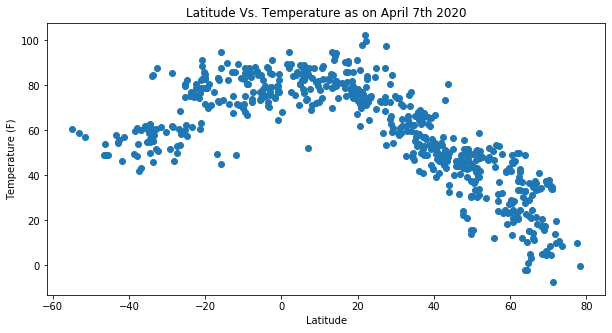

In [19]:
plt.figure(figsize=(10,5))
x_values = cityWeather['Latitude']
y_values = cityWeather['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude Vs. Temperature as on April 7th 2020')
plt.savefig('Lat_Vs.Temp.PNG')
plt.show()

The code above uses the object "plt" and calls series of methods on it to set x &  y axes values , set labels , titles and uses the obj.scatter() method to scatter plot. 

Its Pretty clear from the above plot that the temperatures are higher 20 degrees North and South of the Equator. Then , it gradually falls.

#### Latitude vs. Humidity Plot

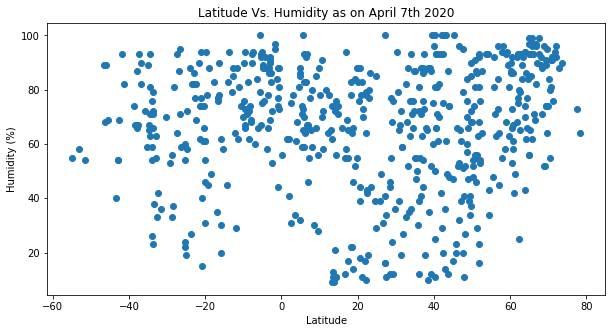

In [12]:
plt.figure(figsize=(10,5))
x_values = cityWeather['Latitude']
y_values = cityWeather['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude Vs. Humidity as on April 7th 2020')
plt.show()

The code above uses the object "plt" and calls series of methods on it to set x &  y axes values , set labels , titles and uses the obj.scatter() method to scatter plot. 

It can be Infered from the plot above that 10 deg N and 10 deg S around the Equator had higher humidity , also as you go North , the  Humidity seems to increase as well.

#### Latitude vs. Cloudiness Plot

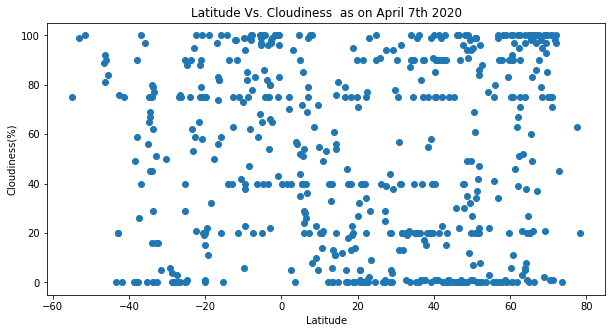

In [13]:
plt.figure(figsize=(10,5))
x_values = cityWeather['Latitude']
y_values = cityWeather['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude Vs. Cloudiness  as on April 7th 2020')
plt.show()

The code above uses the object "plt" and calls series of methods on it to set x &  y axes values , set labels , titles and uses the obj.scatter() method to scatter plot. 

From the plot above Latitude doesnt seems to be co-related to cloudiness.

#### Latitude vs. Wind Speed Plot

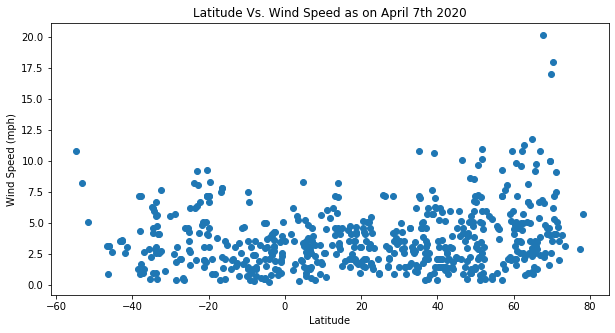

In [14]:
plt.figure(figsize=(10,5))
x_values = cityWeather['Latitude']
y_values = cityWeather['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude Vs. Wind Speed as on April 7th 2020')
plt.show()

The code above uses the object "plt" and calls series of methods on it to set x & y axes values , set labels , titles and uses the obj.scatter() method to scatter plot.

from the above plot it more seems like the winds sped faster North of Eaquator after 40 degrees. Also the windspeeds are consistent near the Equator.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression